In [2]:
import mglearn
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

## 랜덤포레스트

- 매개변수
    1. e_estimators 트리의 개수
    2. max_feature 트리를 만들 때 고려할 feature 수, 1로하면 하나의 feature 당 임계점을 찾는다. 커질 수록 트리들이 비슷해짐
    3. n_jobs 사용 코어 개수 -1로 하면 컴퓨터의 모든 코어 사용

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)

<IPython.core.display.Javascript object>


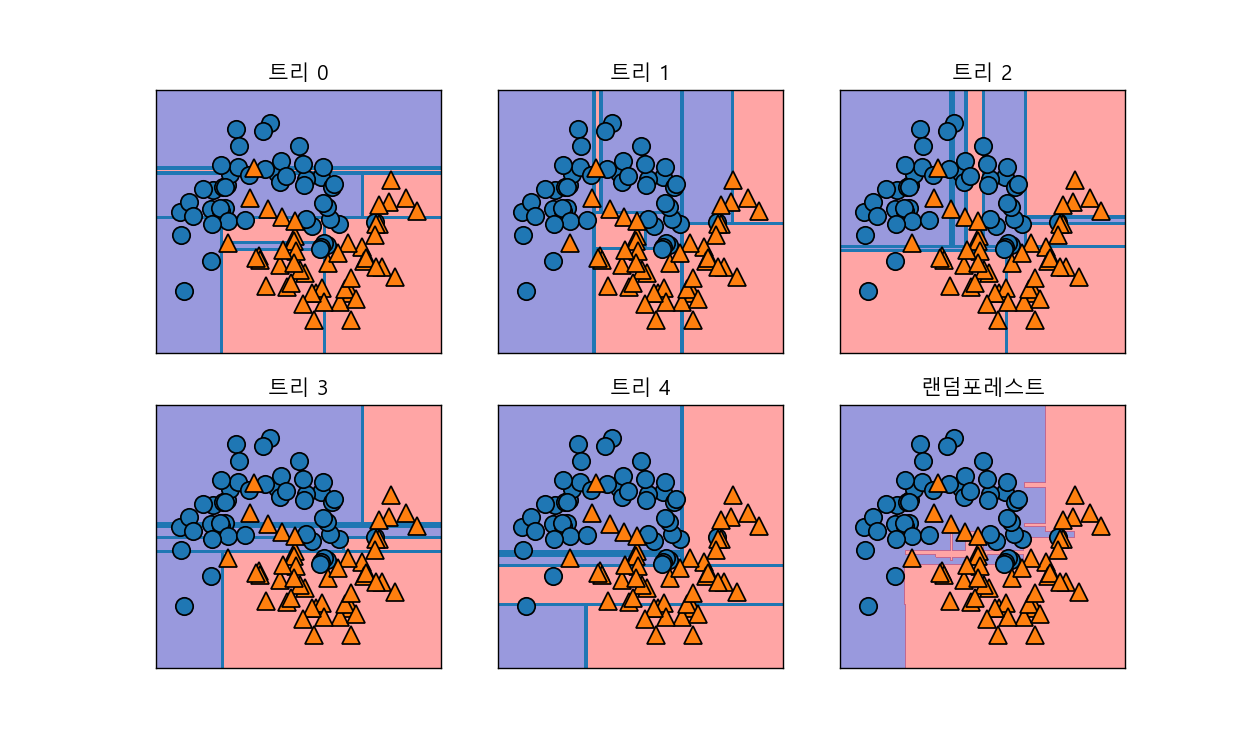

In [22]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('랜덤포레스트')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=98).fit(X_train,y_train)

print('train set score: {:.3f}'.format(forest.score(X_train,y_train)))
print('test set score: {:.3f}'.format(forest.score(X_test,y_test)))

train set score: 1.000
test set score: 0.958


In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')
    plt.ylim(-1,n_features)

<IPython.core.display.Javascript object>


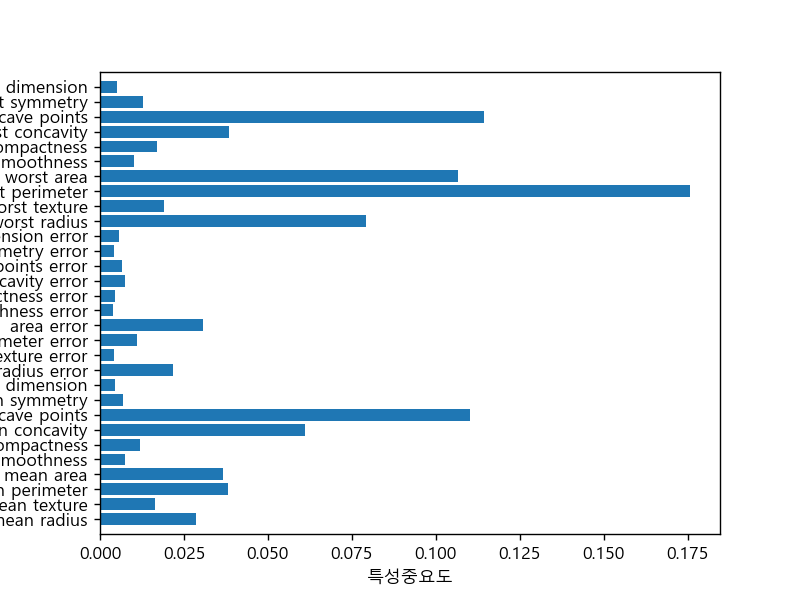

In [12]:
plt.figure()
plot_feature_importances_cancer(forest)

## 그래디언트 부스팅
- parameta
    1. max_depth 5보다는 작게하는 것이 좋다.
    2. n_estimators
    3. leaning_rate  
      

- 장단점
    - 강력하다.
    - 매개변수를 잘 조절해야한다.
    - 훈련시간이 길다.
    

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

def gbrt_score(m=3,n=0.1):    
    
    print(f'@ max_depth={m},learning_rate={n}')
    print('------------------------')
    print('train set score: {:.3f}'.format(gbrt.score(X_train,y_train)))
    print('test set score: {:.3f}'.format(gbrt.score(X_test,y_test)))
    print('------------------------')

In [9]:
gbrt_score(1,1)

@ max_depth=1,learning_rate=1
------------------------
train set score: 1.000
test set score: 0.979
------------------------


<IPython.core.display.Javascript object>


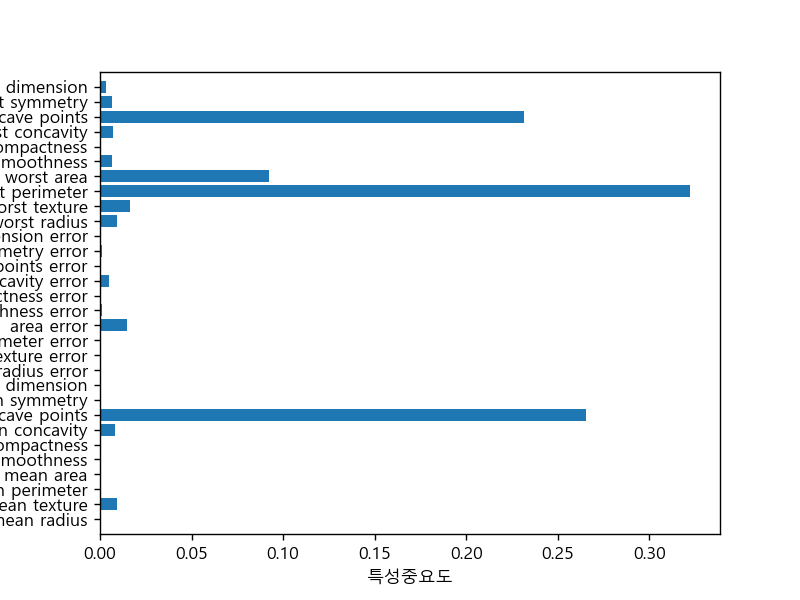

In [11]:
plt.figure()
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1,learning_rate=0.1).fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

## 배깅, 엑스트라 트리, 에이다 부스트

In [13]:
Xm,ym = make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,ym,stratify=ym,random_state=42)

Xc_train,Xc_test,yc_train,yc_test = train_test_split(cancer.data,cancer.target,random_state=0)

### 배깅

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,oob_score=True,n_jobs=-1,random_state=42).fit(Xc_train,yc_train)


In [18]:
def bagging_model(model,n=10):
    bagging = BaggingClassifier(model, n_estimators=n,oob_score=True,n_jobs=-1,random_state=42).fit(Xc_train,yc_train)
    print('train set score: {:.3f}'.format(bagging.score(Xc_train,yc_train)))
    print('test set score: {:.3f}'.format(bagging.score(Xc_test,yc_test)))
    print('oob sample score: {:.3f}'.format(bagging.oob_score_))

In [17]:
from sklearn.svm import SVC
bagging_model(SVC())

train set score: 0.906
test set score: 0.923
oob sample score: 0.906


In [19]:
from sklearn.tree import DecisionTreeClassifier
bagging_model(DecisionTreeClassifier(),5)

train set score: 0.988
test set score: 0.923
oob sample score: 0.866


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


<IPython.core.display.Javascript object>


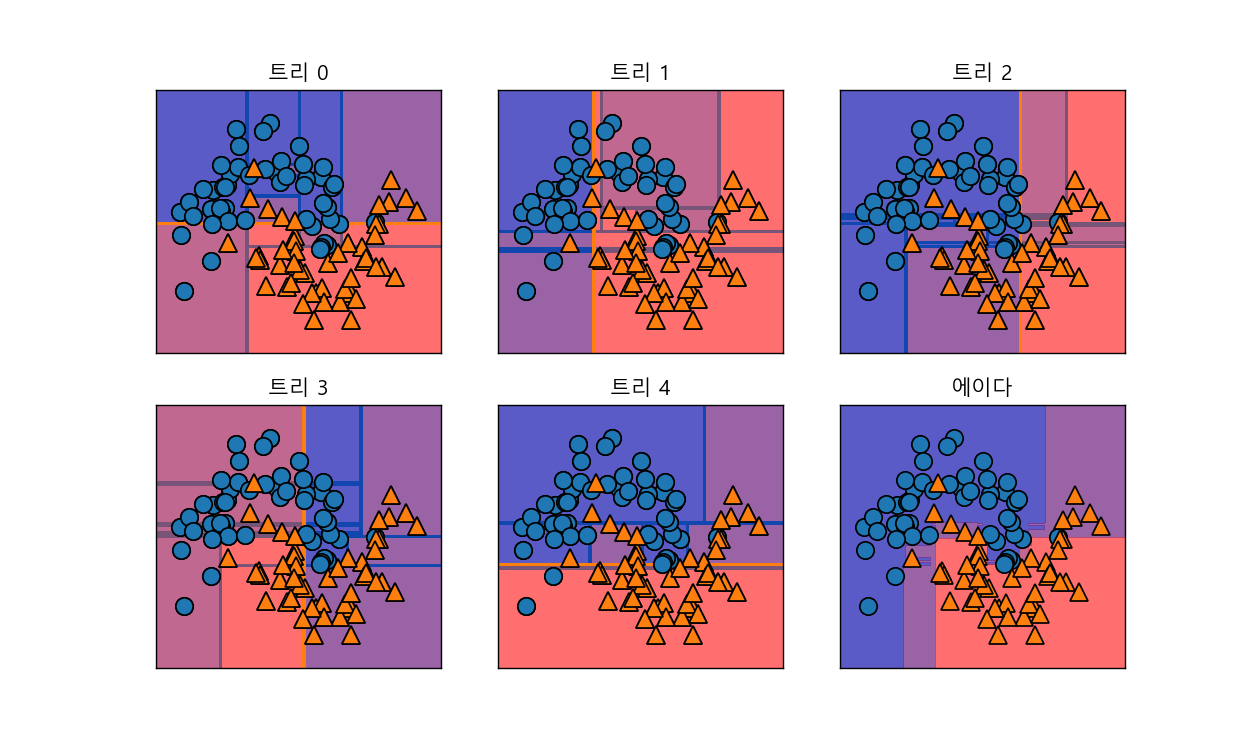

In [38]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,oob_score=True,n_jobs=-1,random_state=42).fit(Xm_train,ym_train)
fig, axes = plt.subplots(2,3, figsize=(10,6))
for i, (ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('배깅')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [24]:
bagging_model(DecisionTreeClassifier(),n=100)

train set score: 1.000
test set score: 0.965
oob sample score: 0.948


### 엑스트라 트리

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5,n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

<IPython.core.display.Javascript object>


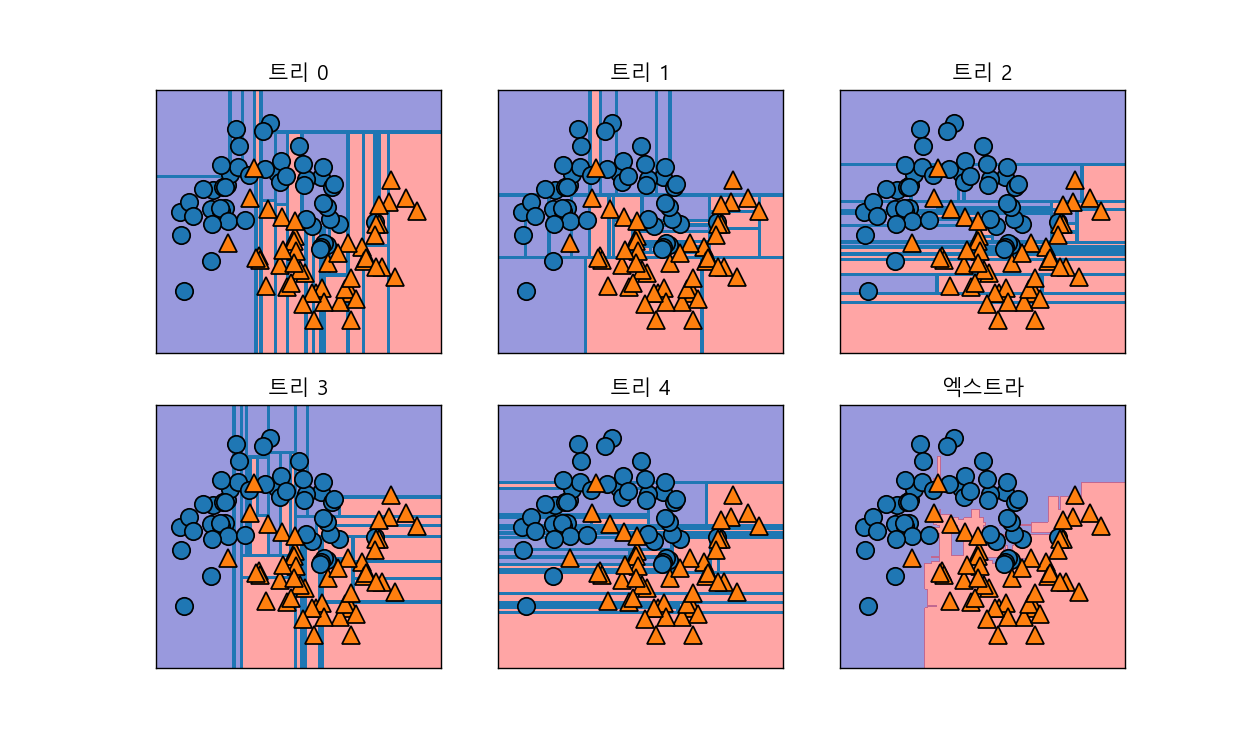

In [32]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
for i, (ax,tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(xtree,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('엑스트라')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [34]:
xtree = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0).fit(Xc_train,yc_train)

In [36]:
print('train set score: {:.3f}'.format(xtree.score(Xc_train,yc_train)))
print('test set score: {:.3f}'.format(xtree.score(Xc_test,yc_test)))

train set score: 1.000
test set score: 0.972


<IPython.core.display.Javascript object>


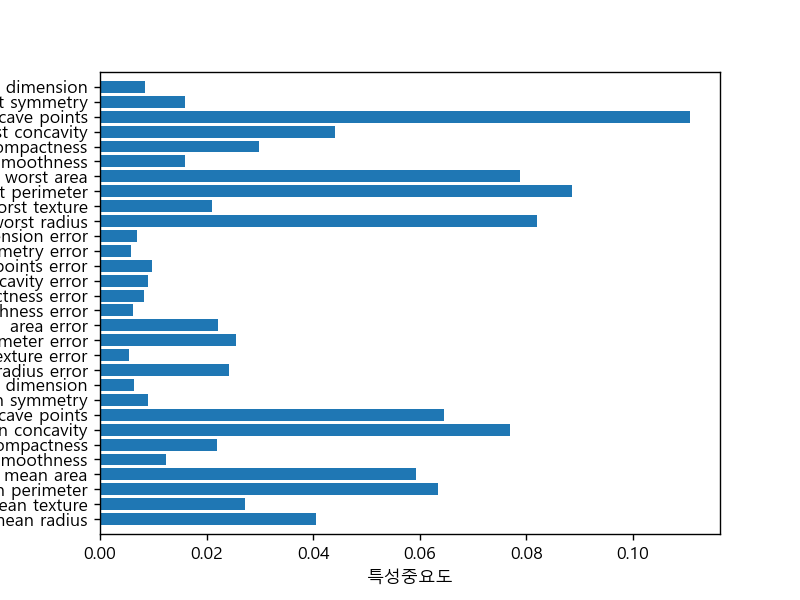

In [41]:
plt.figure()
plot_feature_importances_cancer(xtree)

### 에이다 부스트

<IPython.core.display.Javascript object>


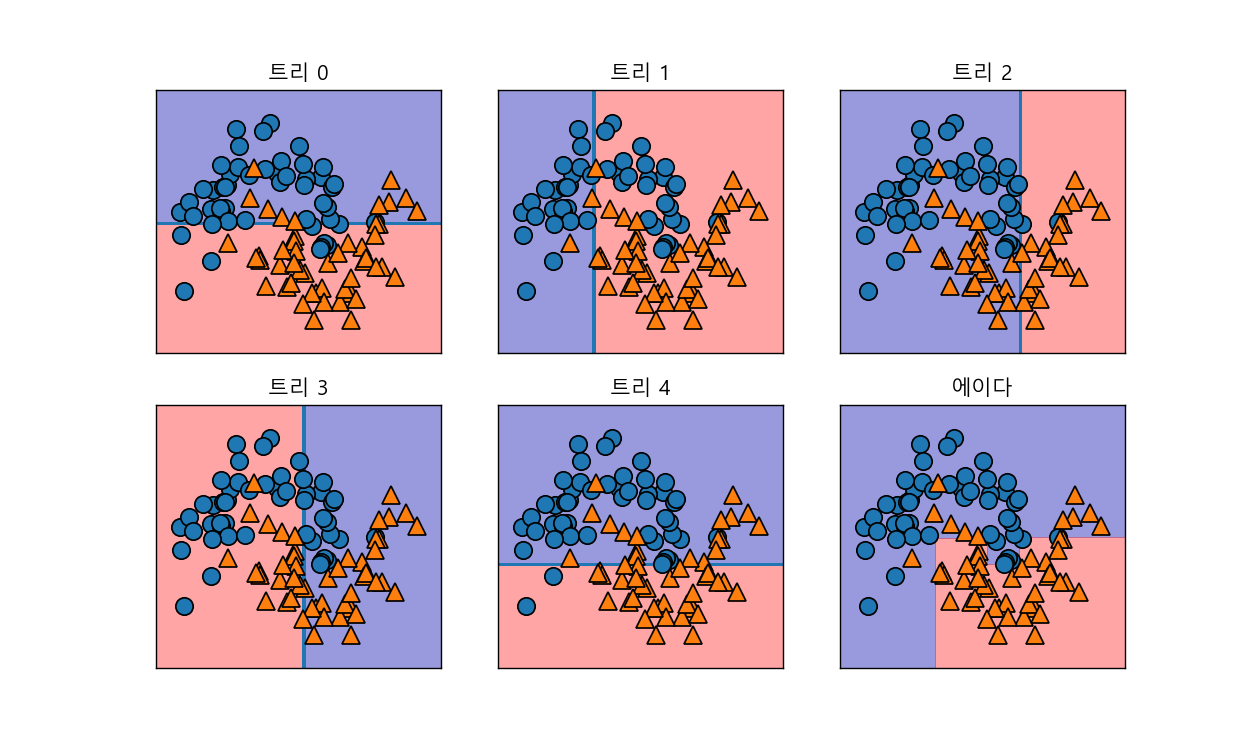

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5,random_state=42)
ada.fit(Xm_train,ym_train)

fig, axes = plt.subplots(2,3, figsize=(10,6))
for i, (ax,tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(ada,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('에이다')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [50]:
ada = AdaBoostClassifier(n_estimators=100,random_state=42).fit(Xc_train,yc_train)

print('train set score: {:.3f}'.format(ada.score(Xc_train,yc_train)))
print('test set score: {:.3f}'.format(ada.score(Xc_test,yc_test)))

train set score: 1.000
test set score: 0.986


<IPython.core.display.Javascript object>


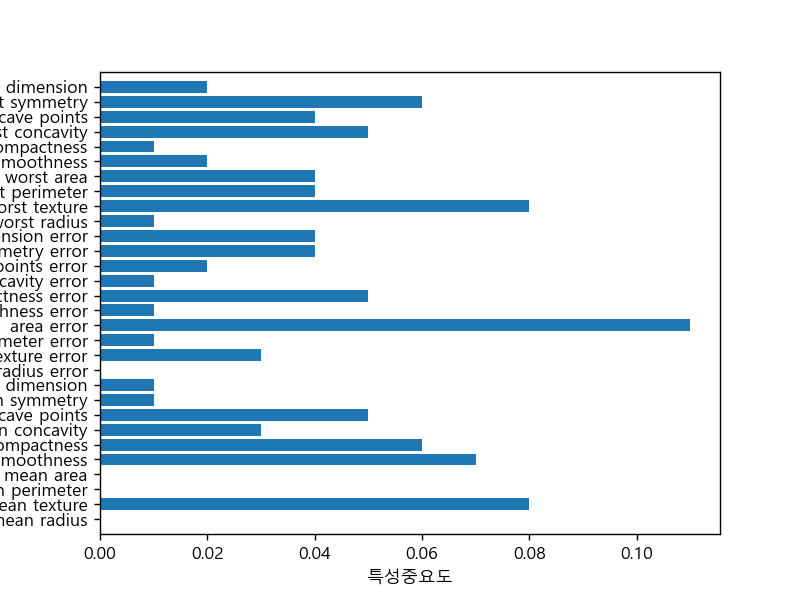

In [51]:
plt.figure()
plot_feature_importances_cancer(ada)